In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
# from nn.conv import LeNet
from imutils import paths
import imutils
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
# from utils.cnnhelper import plotHistory


In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last"
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format == "channels_first":
            inputShape = (depth, height, width)
        
        # define the first (and only) CONV => RELU layer
        model.add(Conv2D(20, (5,5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # softmax classifier
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model


In [58]:
import matplotlib.pyplot as plt
import numpy as np

def plotHistory(H, numEpochs):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, numEpochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, numEpochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, numEpochs), H.history["accuracy"], label="train_accuracy")   # Sửa lại ở đây
    plt.plot(np.arange(0, numEpochs), H.history["val_accuracy"], label="val_accuracy") # Và ở đây
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

In [55]:
datasetPath = "C:/Users/hung0/Documents/IUH/computer_vision/BaiTapTuan/Week_9/Chapter22/dataset/"
outputModel = "C:/Users/hung0/Documents/IUH/computer_vision/BaiTapTuan/Week_9/Chapter22/models/lenet.keras"
numEpochs   = 15

# initialize the list of data and labels
data   = []
labels = []

In [43]:
from imutils import paths

imagePaths = list(paths.list_images(datasetPath))
print("[INFO] Found {} images".format(len(imagePaths)))

[INFO] Found 13165 images


In [44]:
# loop over the input images
for imagePath in sorted(list(paths.list_images(datasetPath))):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=28)
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)


In [45]:
# scale the raw pixel intensities to the range [0, 1]
data   = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [46]:
# Convert the labels from integers to vectors
labelEncoder = LabelEncoder().fit(labels)
labels = to_categorical(labelEncoder.transform(labels), 2)

In [47]:
print(f"Data size: {len(data)}")
print(f"Labels size: {len(labels)}")

Data size: 13165
Labels size: 13165


In [ ]:
# Assuming 'labels' is a one-hot encoded array (e.g., shape [n_samples, n_classes])
classTotals = np.sum(labels, axis=0)  # Sum across all samples for each class

# Calculate class weights using the max class count divided by each class's count
classWeight = np.max(classTotals) / classTotals

# Convert classWeight to a dictionary if needed for model.fit()
classWeight_dict = {i: weight for i, weight in enumerate(classWeight)}

C:\Users\hung0\AppData\Local\Temp\ipykernel_29328\449737728.py:5: RuntimeWarning: divide by zero encountered in divide
  classWeight = np.max(classTotals) / classTotals


In [57]:
classWeight_dict

{0: 1.0, 1: inf}

In [49]:
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
                        test_size=0.20, stratify=labels, random_state=42)

In [50]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

[INFO] compiling model...


C:\Users\hung0\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# train the network
print("[INFO] training network...")
history = model.fit(trainX, trainY, validation_data=(testX, testY),
                    class_weight=classWeight_dict, batch_size=64, epochs=numEpochs, verbose=1)

[INFO] training network...
Epoch 1/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9657 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 1.1333e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 6.0380e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 1.0000 - loss: 2.7796e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 5/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 1.8250e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 6/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 2.9908e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 7/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 1.7626e-24 - val_accuracy: 1.0000 - val_loss: 3.3398e-26
Epoch 8/15
165/165

In [53]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
                                target_names=labelEncoder.classes_))

[INFO] evaluating network...
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

 not_smiling       1.00      1.00      1.00      2633

    accuracy                           1.00      2633
   macro avg       1.00      1.00      1.00      2633
weighted avg       1.00      1.00      1.00      2633



[INFO] serializing network...


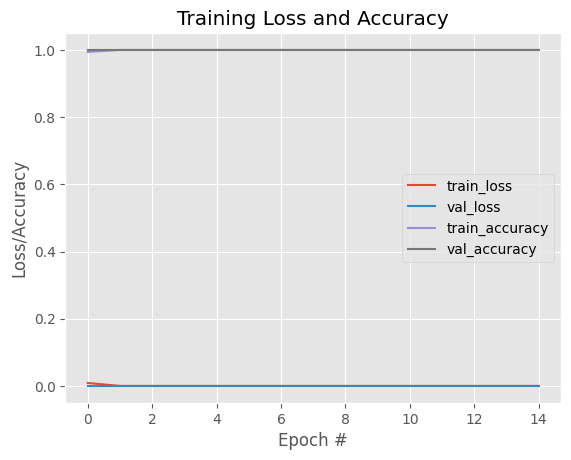

In [59]:
# save the model to disk
print("[INFO] serializing network...")
model.save(outputModel)

plotHistory(history, numEpochs)

In [60]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import cv2

cascadePath     = r"C:\Users\hung0\Documents\IUH\computer_vision\BaiTapTuan\Week_9\Chapter22\haarcascade\haarcascade_frontalface_default.xml"
preTrainedModel = r"C:\Users\hung0\Documents\IUH\computer_vision\BaiTapTuan\Week_9\Chapter22\models\lenet.keras"

# load the face detector cascade and smile detector CNN
detector = cv2.CascadeClassifier(cascadePath)
model = load_model(preTrainedModel)

video = cv2.VideoCapture(0)
while True:
    isGrabbed, frame = video.read()

    # resize the frame, convert it to grayscale
    frame = imutils.resize(frame, width=300)
    frameClone = frame.copy()
    gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces in the input frame
    rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5,
                        minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    # loop over the face bounding boxes
    for (fX, fY, fW, fH) in rects:
        # extract the ROI of the face from the grayscale image
        roi = gray[fY:fY + fH, fX:fX + fW]

        # resize ROI to a fixed 28x28 pixels
        roi = cv2.resize(roi, (28, 28))

        # prepare the ROI for classification via the CNN
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # determine the probabilities of both "smiling" and "not
        # smiling", then set the label accordingly
        (notSmiling, smiling) = model.predict(roi)[0]
        label = "Smiling" if smiling > notSmiling else "Not Smiling"

        # display the label and bounding box rectangle on the output
        # frame
        if label == "Smiling":
            color = (0, 255, 0) # green boundary box
        else:
            color = (0, 0, 255) # red boundary box
        
        cv2.putText(frameClone, label, (fX, fY - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 1)
        cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH), color, 2)
    
    # show our detected faces along with smiling/not smiling labels
    cv2.imshow("Face", frameClone)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━